<a href="https://colab.research.google.com/github/Abinand99/Projects/blob/master/assignment.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
!pip install nselib

In [ ]:
import yfinance as yf
import pandas as pd
import numpy as np
import datetime
from datetime import datetime
import matplotlib.pyplot as plt
from nselib import capital_market

class Stock:
    def __init__(self, symbol, start_date, end_date):
        self.symbol = symbol
        self.hp = self.historical_data(start_date, end_date)


    def historical_data(self, start_date, end_date):
        data = yf.download(self.symbol, start=start_date, end=end_date).dropna()
        return data['Close']
    # taking the historical data from yfinance

    def CurPrice(self, curDate):
        return self.hp[curDate]
    # this part gives the closing price of the date given curDate using historical_data function


    def NDayRet(self, N, curDate):
        start_index = self.hp.index.get_loc(curDate) - N
        end_index = self.hp.index.get_loc(curDate)+1
        returns = self.hp.iloc[start_index:end_index].pct_change()
        return returns.sum()
    #  gives the N-day returns as on the it takes the start index by geting the location of given date(curDate) minus the given value
    #  ending index is name as curdate and plus 1 is added because to get accurate location and iloc is taken

    def DailyRet(self, curDate):
        return self.hp.pct_change().loc[curDate]
    # this fuction gives the daily returns by taking percentage change

    def Last30daysPrice(self, curDate):
        end_index = self.hp.index.get_loc(curDate)+1
        start_index = end_index - 30
        return self.hp.iloc[start_index:end_index]
    # gives the array of last 30 days prices

In [ ]:
# this is the part of portfolio
class portfolio:
    def __init__(self,start_date,end_date):
        self.start_date=start_date
        self.end_date=end_date
        self.benchmark_daily_close=None
        self.benchmark_monthly_returns=None
        self.portfolio_monthly_returns=None
        self.benchmark=self.benchmark()
        self.strategy=self.strategy()


    def benchmark(self):
        benchmark = Stock('^NSEI',start_date,end_date)
        benchmark_daily_close=benchmark.hp
        benchmark_daily_returns= benchmark_daily_close.pct_change().dropna()
        benchmark_monthly_returns = benchmark_daily_returns.resample('M').mean()
        self.benchmark_monthly_returns=benchmark_monthly_returns
        self.benchmark_daily_close=benchmark_daily_returns
        return benchmark_daily_returns,benchmark_daily_close
    # bennchmark values are taken daily returns,daily close , monthly returns for ploting graph all are taken

    def strategy(self):
        nifty50=capital_market.nifty50_equity_list()
        symbols=nifty50['Symbol']
    # this module hel me to get the nifty 50 company name

        strategy_selection=pd.DataFrame(index=self.benchmark_monthly_returns.index)
        company_daily_close=pd.DataFrame(index=self.benchmark_daily_close.index)
    # these are blank data frames thaken for inserting values

        for i in symbols:
            company_data=Stock(i+'.NS',start_date,end_date)
            company_daily_close[i]=company_data.hp
            company_daily_returns=company_data.hp.pct_change().dropna()
            company_daily_positive_returns=company_daily_returns[company_daily_returns > 0]
            company_monthly_returns = company_daily_returns.resample('M').mean()
            company_monthly_positive_returns = company_monthly_returns[company_monthly_returns > 0]
            strategy_selection[i] =company_monthly_positive_returns
    # this loop takes the closing value of individual companies and put it to blank dataframe
    # takes monthly and daily positive returns of the individual company

        portfolio_monthly_returns=strategy_selection.mean(axis=1).dropna()
        self.portfolio_monthly_returns=portfolio_monthly_returns
        return company_daily_positive_returns,portfolio_monthly_returns


    def plot_graph(self):
        plt.plot(self.benchmark_monthly_returns.index,self.benchmark_monthly_returns)
        plt.plot(self.portfolio_monthly_returns.index,self.portfolio_monthly_returns)
        plt.title("Equity Curves")
        plt.xlabel("Date")
        plt.ylabel("Returns")
        plt.legend()
        plt.show()
    # this part gives the equiy curve of stratrgy and nifty50 returns

    def summary_performance(self,sb):
        returns,close=sb
        years=(self.benchmark_daily_close.index[-1]-self.benchmark_daily_close.index[0]).days/365.25
        means=returns.mean()
        standard_deviation=np.std(returns)
        sharp_ratio=(np.sqrt(252))*(means/standard_deviation)
        volatility=(np.sqrt(252))*standard_deviation*100
        cagr=(((close.iloc[-1])/(close.iloc[0]))**(1/years))-1
        print('sharp=',sharp_ratio)
        print('volatility=',volatility)
        print('cagr=',cagr)
    # perfomence is taken

In [ ]:
# start_date='2023-01-01'
# end_date='2024-01-01'
# n=5

In [ ]:
start_date = input("Enter a starting date (YYYY-MM-DD): ")
end_date=input("Enter a ending date (YYYY-MM-DD):")
n=int(input('Enter the number of days return:'))
try:
    start_date = datetime.strptime(start_date, "%Y-%m-%d")
    end_date=datetime.strptime(end_date, "%Y-%m-%d")
except ValueError:
    print("Invalid date format. Please use YYYY-MM-DD.")

Enter a starting date (YYYY-MM-DD): 2023-01-01
Enter a ending date (YYYY-MM-DD):2024-01-01
Enter the number of days return:5


In [ ]:
a=Stock('AAPL',start_date,end_date)
date=input("Enter a date (YYYY-MM-DD):")
print('CLosing price of given date:',a.CurPrice(date))
print("Daily returns=",a.DailyRet(date))
print('Last 30 days price:','\n',a.Last30daysPrice(date))
print(n,' days retuns: ',a.NDayRet(n,date))


[*********************100%%**********************]  1 of 1 completed
Enter a date (YYYY-MM-DD):2023-4-03
CLosing price of given date: 166.1699981689453
Daily returns= 0.00770166355044366
Last 30 days price: 
 Date
2023-02-21    148.479996
2023-02-22    148.910004
2023-02-23    149.399994
2023-02-24    146.710007
2023-02-27    147.919998
2023-02-28    147.410004
2023-03-01    145.309998
2023-03-02    145.910004
2023-03-03    151.029999
2023-03-06    153.830002
2023-03-07    151.600006
2023-03-08    152.869995
2023-03-09    150.589996
2023-03-10    148.500000
2023-03-13    150.470001
2023-03-14    152.589996
2023-03-15    152.990005
2023-03-16    155.850006
2023-03-17    155.000000
2023-03-20    157.399994
2023-03-21    159.279999
2023-03-22    157.830002
2023-03-23    158.929993
2023-03-24    160.250000
2023-03-27    158.279999
2023-03-28    157.649994
2023-03-29    160.770004
2023-03-30    162.360001
2023-03-31    164.899994
2023-04-03    166.169998
Name: Close, dtype: float64
5  days 

In [ ]:
c=portfolio(start_date,end_date)


[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
[*********************100%%*******

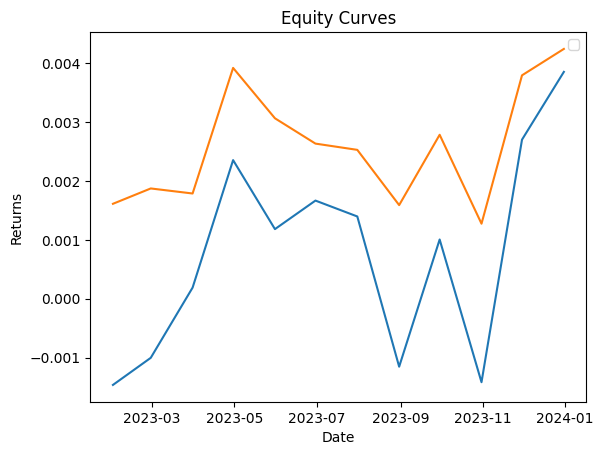

In [ ]:
c.plot_graph()

In [ ]:
print('Perfomence summary of Strategy:')
c.summary_performance(c.strategy)

Perfomence summary of Strategy:
sharp= 16.1228592262546
volatility= 16.004625270469813
cagr= 1.670121552459177


In [ ]:
print('Perfomence summary of benchmark:')
c.summary_performance(c.benchmark)

Perfomence summary of benchmark:
sharp= 1.9190212452786042
volatility= 9.805446957220216
cagr= 0.19729519579552934


Performance can be mesured here